<a href="https://colab.research.google.com/github/tripuragorla/CMPE-297-Assignments/blob/main/Assignment%203/HuggingFace_ParaphraseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb
!wandb login

wandb: Currently logged in as: shivkumarganesh (use `wandb login --relogin` to force relogin)


In [ ]:
!pip install transformers
!pip install datasets

In [ ]:
import wandb
wandb.init(project="Hugging-Faces-Paraphrase-Detection", entity="shivkumarganesh")

In [ ]:
%env WANDB_LOG_MODEL=true

env: WANDB_LOG_MODEL=true


In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding

raw_datasets = load_dataset("glue","mrpc")

checkpoint = 'bert-base-uncased'

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenizer_function(example):
  return tokenizer(example['sentence1'], example['sentence2'], truncation=True)

Reusing dataset glue (/root/.cache/huggingface/datasets/glue/mrpc/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
tokenized_datasets = raw_datasets.map(tokenizer_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from datasets import load_metric
import numpy as np

def compute_metrics(eval_preds):
    metric = load_metric("glue", "mrpc")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments("test-trainer", evaluation_strategy="epoch", report_to="wandb")

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset = tokenized_datasets["train"],
    eval_dataset = tokenized_datasets["validation"],
    data_collator = data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence1, sentence2, idx.
***** Running training *****
  Num examples = 3668
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1377
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.370612,0.852941,0.895470
2,0.506900,0.507108,0.857843,0.904605
3,0.251400,0.674802,0.870098,0.910321


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence1, sentence2, idx.
***** Running Evaluation *****
  Num examples = 408
  Batch size = 8
Saving model checkpoint to test-trainer/checkpoint-500
Configuration saved in test-trainer/checkpoint-500/config.json
Model weights saved in test-trainer/checkpoint-500/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-500/tokenizer_config.json
Special tokens file saved in test-trainer/checkpoint-500/special_tokens_map.json
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence1, sentence2, idx.
***** Running Evaluation *****
  Num examples = 408
  Batch size = 8
Saving model checkpoint to test-trainer/checkpoint-1000
Configuration saved in test-trainer/checkpoint-1000/config.json
Model weights saved in test-trainer/checkpoin

TrainOutput(global_step=1377, training_loss=0.30268503880275704, metrics={'train_runtime': 409.7768, 'train_samples_per_second': 26.854, 'train_steps_per_second': 3.36, 'total_flos': 405470580750720.0, 'train_loss': 0.30268503880275704, 'epoch': 3.0})

In [ ]:
predictions = trainer.predict(tokenized_datasets["validation"])
print(predictions.predictions.shape, predictions.label_ids.shape)

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence1, sentence2, idx.
***** Running Prediction *****
  Num examples = 408
  Batch size = 8


(408, 2) (408,)


In [ ]:
!pip install gradio

In [ ]:
model.save_pretrained('/content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/classification')

Configuration saved in /content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/classification/config.json
Model weights saved in /content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/classification/pytorch_model.bin


In [ ]:
tokenizer.save_pretrained('/content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/classification')

tokenizer config file saved in /content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/classification/tokenizer_config.json
Special tokens file saved in /content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/classification/special_tokens_map.json


('/content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/classification/tokenizer_config.json',
 '/content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/classification/special_tokens_map.json',
 '/content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/classification/vocab.txt',
 '/content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/classification/added_tokens.json',
 '/content/drive/MyDrive/Semester 4/Advance Deep Learning/Assignments/Assignment 4/Models/classification/tokenizer.json')

In [ ]:
wandb.finish()

eval/accuracy,▁▃█
eval/f1,▁▅█
eval/loss,▁▄█
eval/runtime,▁█▅
eval/samples_per_second,█▁▄
eval/steps_per_second,█▁▄
train/epoch,▁▁▅▅██
train/global_step,▁▁▅▅██
train/learning_rate,█▁
train/loss,█▁
train/total_flos,▁


In [ ]:
raw_datasets['validation'][11]

{'idx': 83,
 'label': 0,
 'sentence1': '" Sanitation is poor ... there could be typhoid and cholera , " he said .',
 'sentence2': '" Sanitation is poor , drinking water is generally left behind . . . there could be typhoid and cholera . "'}

In [ ]:
predicted_output=trainer.predict([tokenizer('" Sanitation is poor ... there could be typhoid and cholera , " he said .', 
                                            '" Sanitation is poor , drinking water is generally left behind . . . there could be typhoid and cholera . "')])

***** Running Prediction *****
  Num examples = 1
  Batch size = 8


In [ ]:
predicted_output

PredictionOutput(predictions=array([[ 3.3133836, -3.3667948]], dtype=float32), label_ids=None, metrics={'test_runtime': 0.0431, 'test_samples_per_second': 23.199, 'test_steps_per_second': 23.199})

In [ ]:
np.argmax(predicted_output.predictions)

0

In [ ]:
import gradio as gr

def process_sentences(sentence1, sentence2):
  pred_outputs = trainer.predict([tokenizer(sentence1, sentence2)])
  output = np.argmax(pred_outputs.predictions)
  if output == 0:
    return 'Sentences are not Equivalent'
  else:
    return 'Sentences are Equivalent'

gr.Interface(fn=process_sentences, inputs=["text", "text"], outputs="text").launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 72 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted
Running on External URL: https://42927.gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://42927.gradio.app')

# Gradio Output

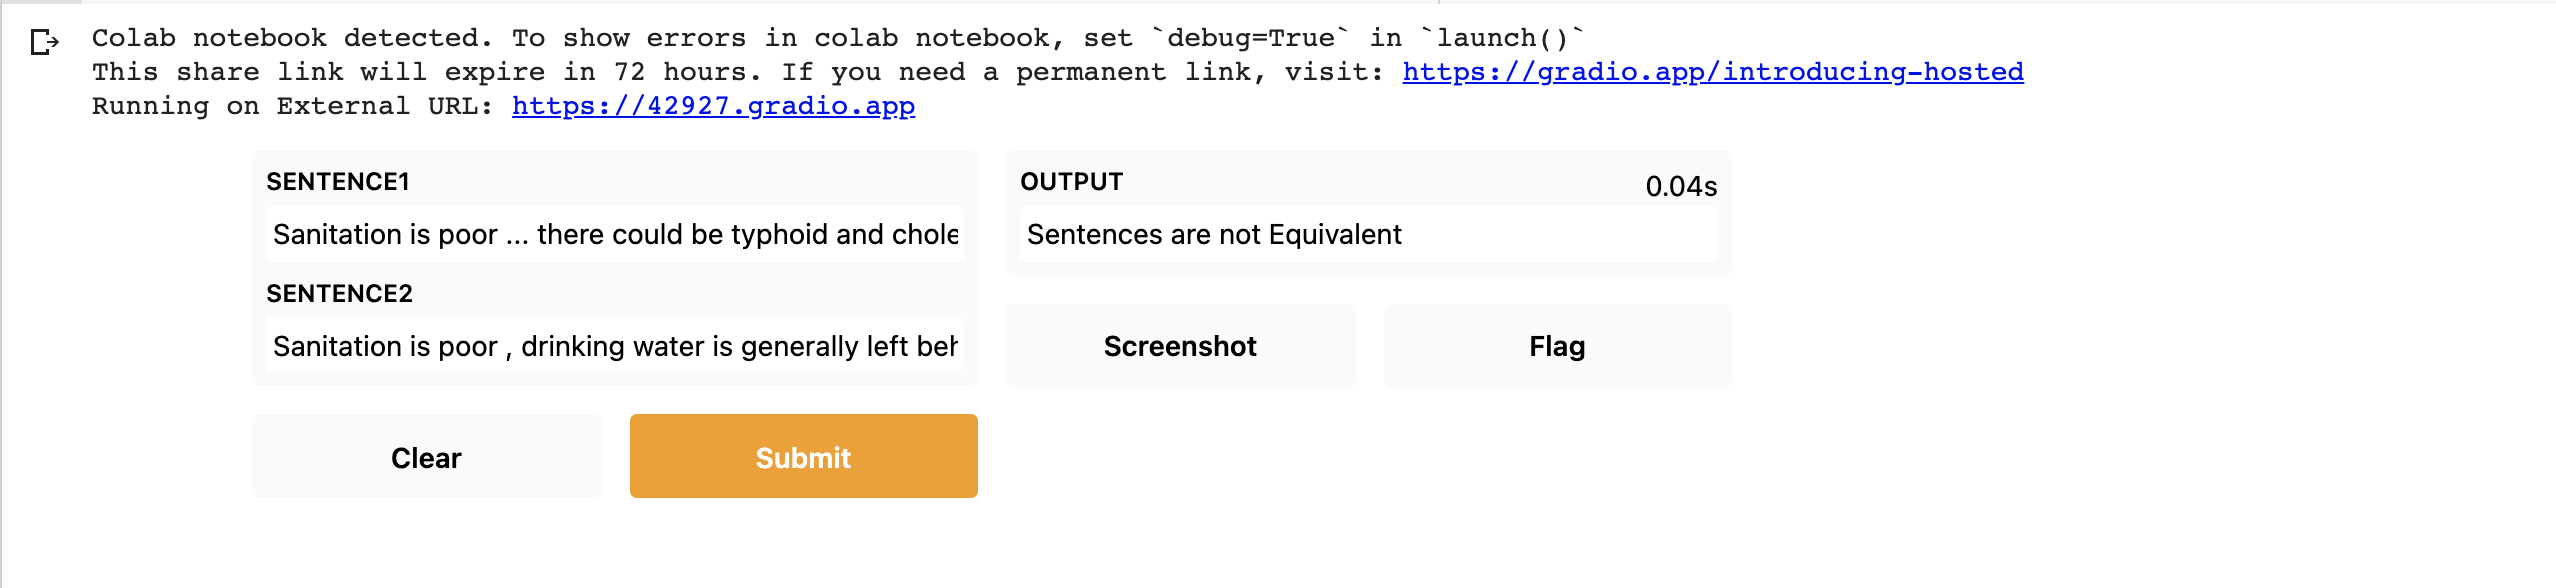

# WanDB Results

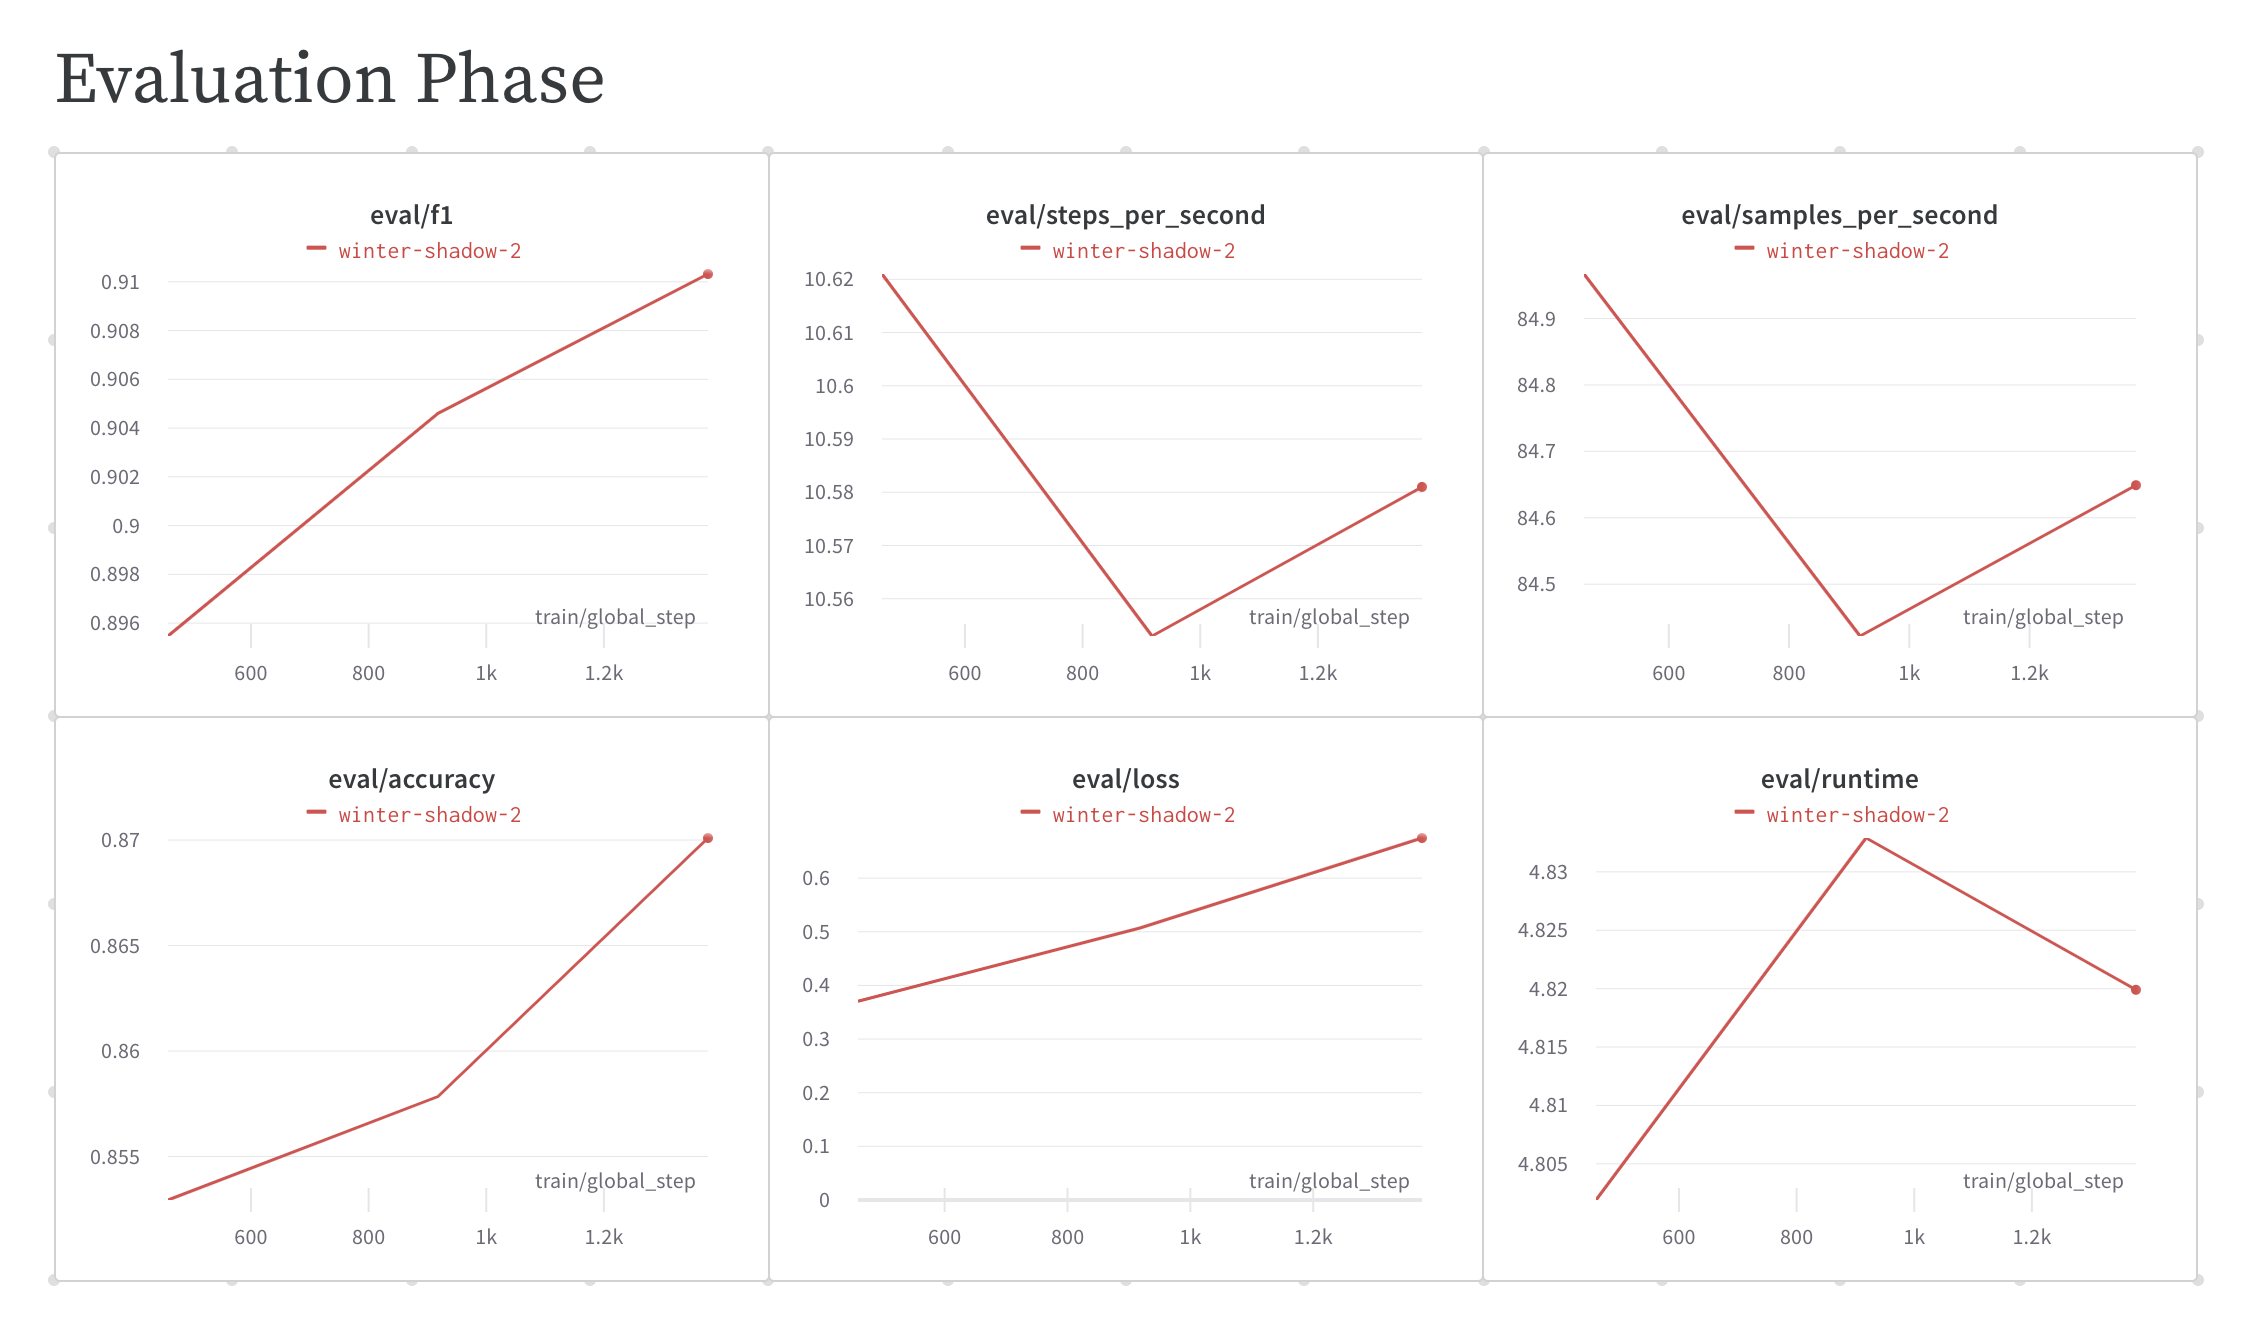

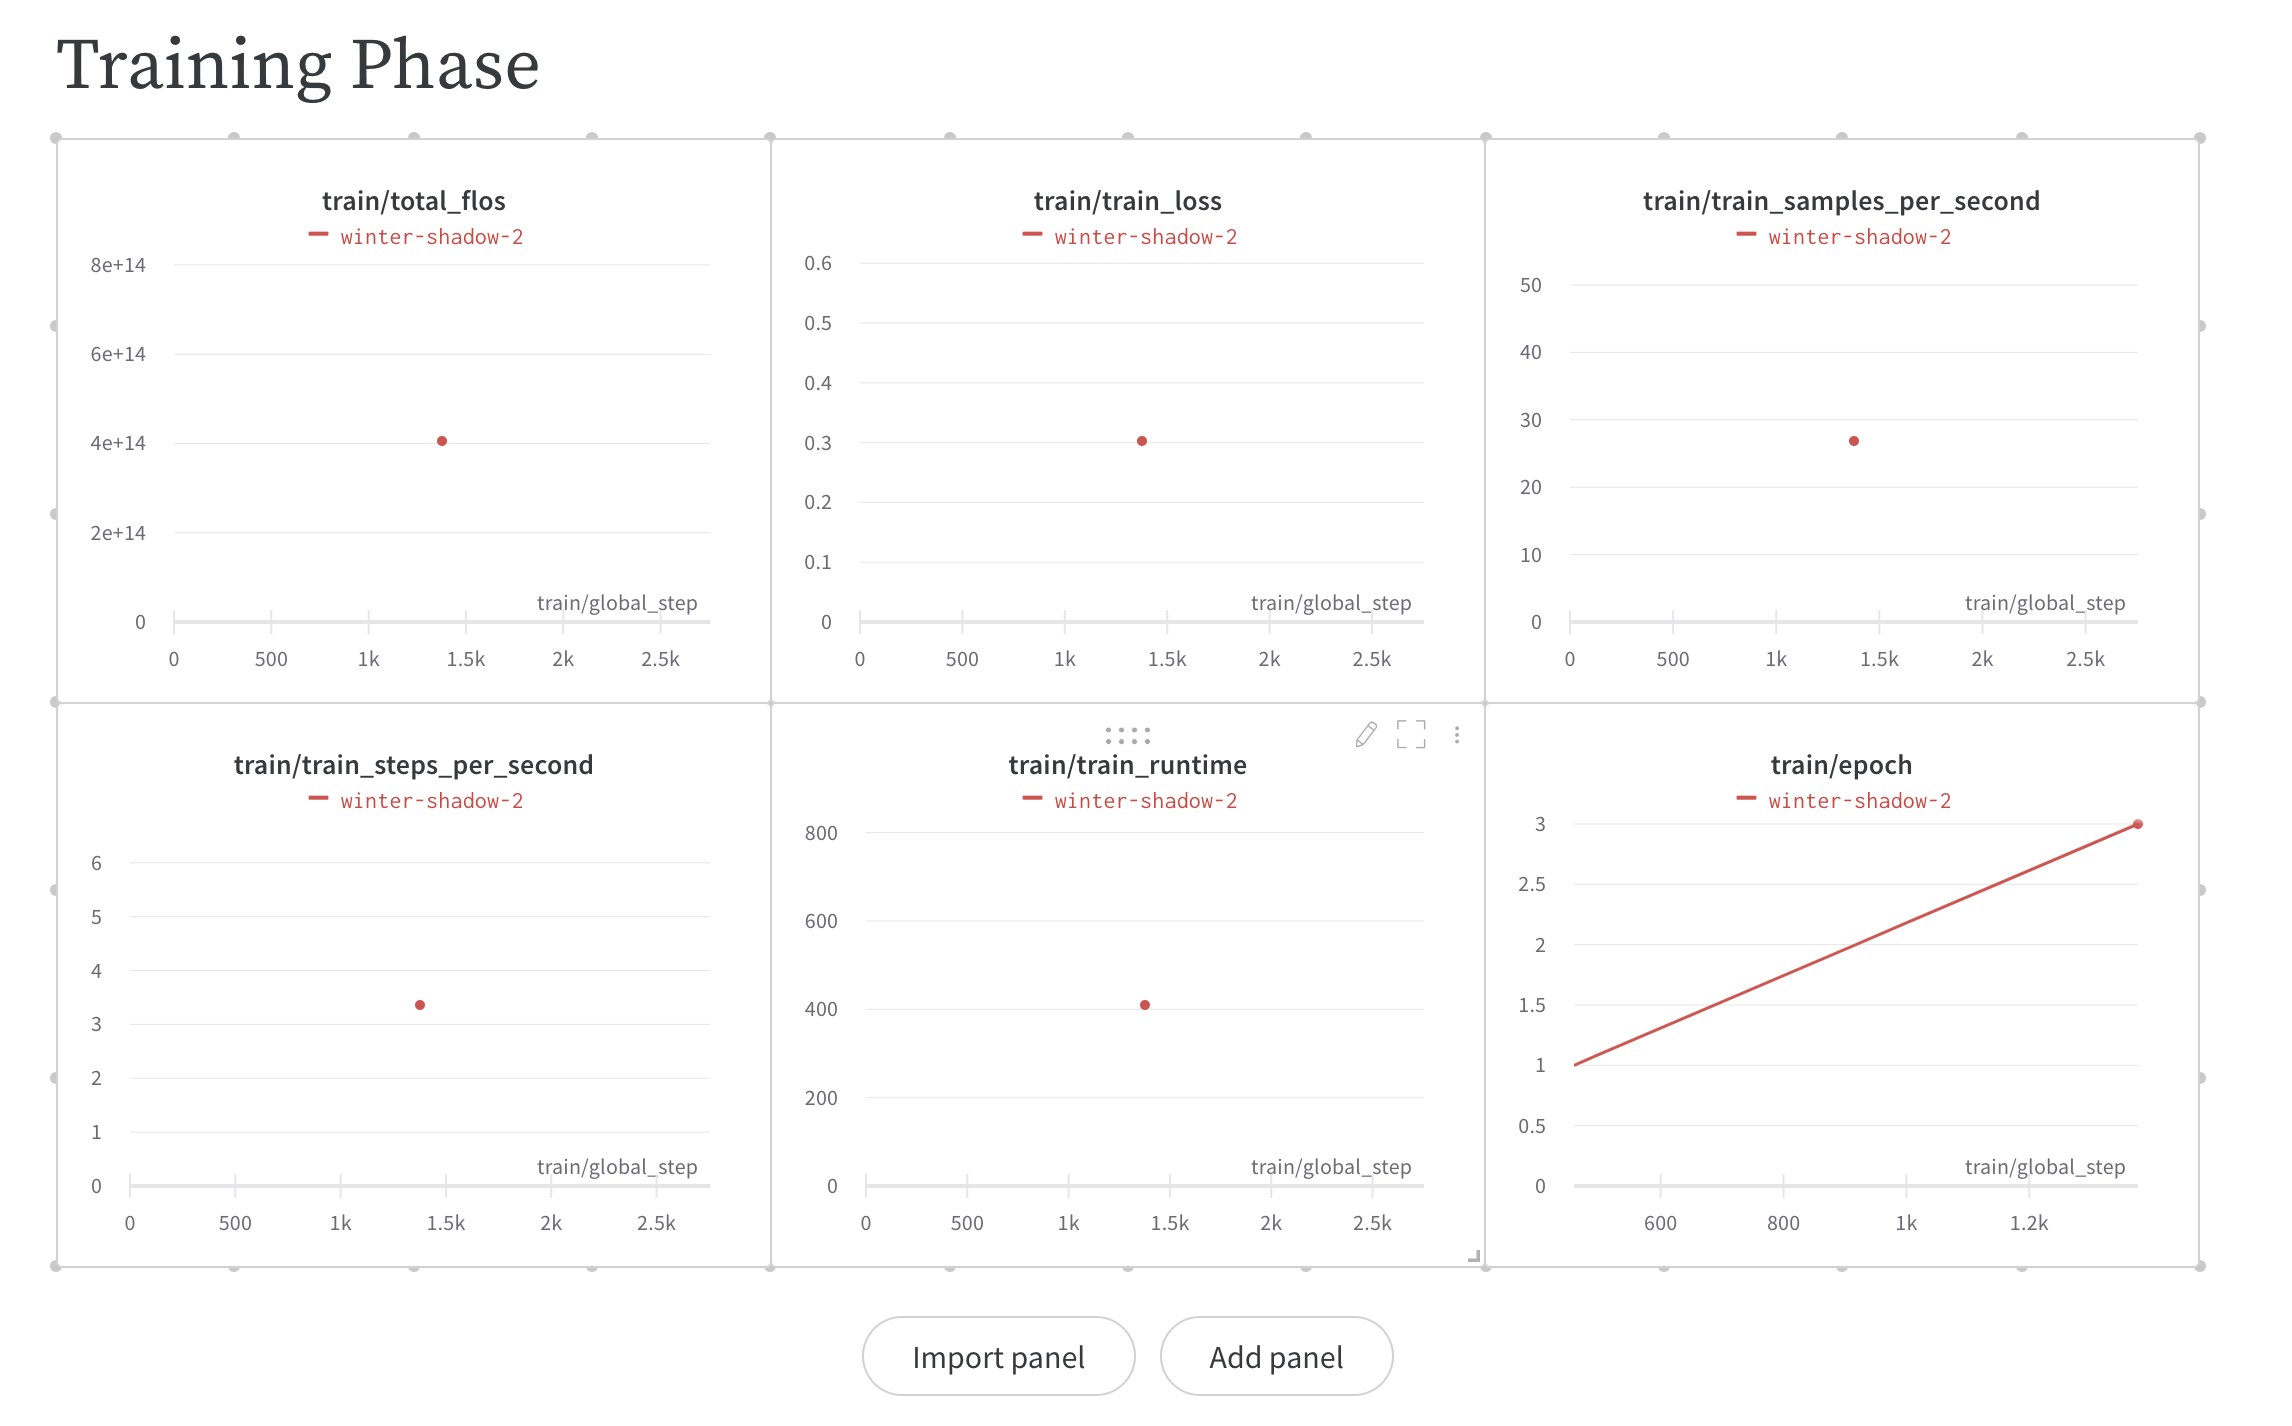